# 필요한 모듈 import

In [1]:
#드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install konlpy
!pip install mecab-python
!bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 40.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 488.6/488.6 kB 37.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 3.4 MB/s eta 0:00:00
  Created wheel for mecab-python: filename=mecab_python-1.0.0-py3-none-any.whl size=1232 sha256=390d49b836e5ff0231ce62a9333032ab5ff2fe842006ebab20d93e2d2e58a767
  Stored in directory: /root/.cache/pip/wheels/ec/41/c8/ce8fb469be2547ce596c4000613806505dc54c296aae45da71
Successfully built mecab-python
Install mecab-ko
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 1381k  100 1381k    0     0  1012k      0  0:00:01  0:00:01 --:--:-- 4187k
mecab-0.996-ko-0.9.2/
mecab-0.996-ko-0.9.2/example/
mecab-0.996-ko-0.9.2/example

In [3]:
# 패키지 설치
!pip install kiwipiepy #형태소분석기
!pip install tomotopy #LDA 설계용
import pandas as pd #xlsx파일 불러오기 위한 pandas
import numpy as np
import datetime as dt #날짜 자료형 패키지
import matplotlib.pyplot as plt
import seaborn as sns
import re #정규표현식
import random #랜덤함수
import tomotopy as tp #tomotopy
import collections #counter 호출용
from math import sqrt #제곱근 계산
from tqdm import tqdm
tqdm.pandas() #진행상황 확인
from kiwipiepy import Kiwi #키위
from matplotlib import font_manager, rc #시각화 폰트 패키지
from wordcloud import WordCloud,STOPWORDS #워드클라우드 패키지
from PIL import Image #이미지 배경 패키지

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 29.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kiwipiepy-model: filename=kiwipiepy_model-0.16.0-py3-none-any.whl size=30813256 sha256=52572f8791be596b9660df853213367ff5abaa66154da8e3556128ca1c01213f
  Stored in directory: /root/.cache/pip/wheels/6b/03/2b/ac2c97cc65ebd9df3516f4b900adc2f0a744df8d1375b2e2ef
Successfully built kiwipiepy-model
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 47.8 MB/s eta 0:00:00


In [4]:
from konlpy.tag import Mecab
mecab = Mecab()
print(mecab.morphs("사과와 바나나 그리고 포도를 좋아합니다"))

['사과', '와', '바나나', '그리고', '포도', '를', '좋아합니다']


# 데이터 불러오기



---

1. 제목 중복의 경우, 가장 높은 조회수를 가진 영상만을 남겨두고 모두 제거.
2. 정규 분포 함수로 집중적으로 업로드가 발생했던 시점만 추출


In [5]:
news_all=pd.read_csv('/content/drive/MyDrive/2023 겨울계절 URP/데이터_수집/N번방_네이버뉴스.csv',index_col=0) #저장된 파일 불러오기
#news_all=pd.read_csv('/content/drive/MyDrive/2023 겨울계절 URP/데이터_수집/N번방 유튜브/N번방_youtube_data_No News.csv',index_col=0)
#news_all=pd.read_csv('/content/drive/MyDrive/2023 겨울계절 URP/데이터_수집/원숭이두창 유튜브/원숭이두창_youtube_data_No News.csv',index_col=0)
news_all = news_all.rename(columns={'작성날짜': 'Upload Date'})



In [6]:
news_all.reset_index(inplace=True)

In [7]:
news_all

,URL,link,Upload Date,제목,언론사,댓글수
0,https://n.news.naver.com/mnews/article/016/000...,https://n.news.naver.com/mnews/article/016/000...,2020-04-13 09:38:05,"검찰, 오늘 조주빈 구속기소… 범죄수익 추징 등 보강수사 계속",헤럴드경제,NaN
1,https://n.news.naver.com/mnews/article/020/000...,https://n.news.naver.com/mnews/article/020/000...,2020-04-02 03:04:09,‘박사방’ 영상 재유포자도 수사 착수,동아일보,0
2,https://n.news.naver.com/mnews/article/011/000...,https://n.news.naver.com/mnews/article/011/000...,2020-04-07 21:18:03,"경찰, 조주빈 공범 ‘부따’ 구속영장 신청",서울경제,0
3,https://n.news.naver.com/mnews/article/003/000...,https://n.news.naver.com/mnews/article/003/000...,2020-05-14 11:07:51,"완장방·주홍글씨 운영자 '미희', 구속심사 16분만 종료(종합)",뉴시스,2
4,https://n.news.naver.com/mnews/article/020/000...,https://n.news.naver.com/mnews/article/020/000...,2020-06-14 21:44:02,"해군 대위가 ‘성착취 동영상’ 제작…경찰, 가해자 다수 체포",동아일보,56
...,...,...,...,...,...,...
5486,https://n.news.naver.com/mnews/article/417/000...,https://n.news.naver.com/mnews/article/417/000...,2020-04-26 15:14:20,"‘박사방’ 조주빈 등 3명, 29일 1차 공판 개시",머니S,0
5487,https://n.news.naver.com/mnews/article/003/000...,https://n.news.naver.com/mnews/article/003/000...,2020-03-27 08:02:00,"'n번방·박사방' 이번엔 박멸 될까…경찰, 다시 명운 걸다",뉴시스,48
5488,https://n.news.naver.com/mnews/article/056/001...,https://n.news.naver.com/mnews/article/056/001...,2020-03-26 12:11:07,"검찰, ‘박사방’ 조주빈 첫 소환조사…수사상황 이례적 공개 방침",KBS,5
5489,https://n.news.naver.com/mnews/article/277/000...,https://n.news.naver.com/mnews/article/277/000...,2020-03-26 08:27:12,검찰도 ‘박사방’ 조주빈 신상정보·수사상황 공개키로…전날 심의위 의결,아시아경제,10




---

유튜브 크롤링 결과에서 같은 제목을 가지고 있지만 조회수가 다른 영상들이 추출됨.
가장 높은 조회수를 가진 영상만을 남겨두고 모두 제거.

In [8]:
# Sort DataFrame by 'Views' in descending order
#df_sorted = news_all.sort_values(by='Views', ascending=False)
#df_sorted = news_all.sort_values(by='Views', ascending=False)
# Drop duplicates based on '제목' while keeping the first occurrence (highest Views)
#news_all = df_sorted.drop_duplicates(subset='제목', keep='first')


In [9]:
#파일 확인
news_all.head()

,URL,link,Upload Date,제목,언론사,댓글수
0,https://n.news.naver.com/mnews/article/016/000...,https://n.news.naver.com/mnews/article/016/000...,2020-04-13 09:38:05,"검찰, 오늘 조주빈 구속기소… 범죄수익 추징 등 보강수사 계속",헤럴드경제,NaN
1,https://n.news.naver.com/mnews/article/020/000...,https://n.news.naver.com/mnews/article/020/000...,2020-04-02 03:04:09,‘박사방’ 영상 재유포자도 수사 착수,동아일보,0
2,https://n.news.naver.com/mnews/article/011/000...,https://n.news.naver.com/mnews/article/011/000...,2020-04-07 21:18:03,"경찰, 조주빈 공범 ‘부따’ 구속영장 신청",서울경제,0
3,https://n.news.naver.com/mnews/article/003/000...,https://n.news.naver.com/mnews/article/003/000...,2020-05-14 11:07:51,"완장방·주홍글씨 운영자 '미희', 구속심사 16분만 종료(종합)",뉴시스,2
4,https://n.news.naver.com/mnews/article/020/000...,https://n.news.naver.com/mnews/article/020/000...,2020-06-14 21:44:02,"해군 대위가 ‘성착취 동영상’ 제작…경찰, 가해자 다수 체포",동아일보,56


In [10]:
news_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5491 entries, 0 to 5490
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   URL          5491 non-null   object
 1   link         5491 non-null   object
 2   Upload Date  5491 non-null   object
 3   제목           5491 non-null   object
 4   언론사          5491 non-null   object
 5   댓글수          4969 non-null   object
dtypes: object(6)
memory usage: 257.5+ KB


## 정규분포함수

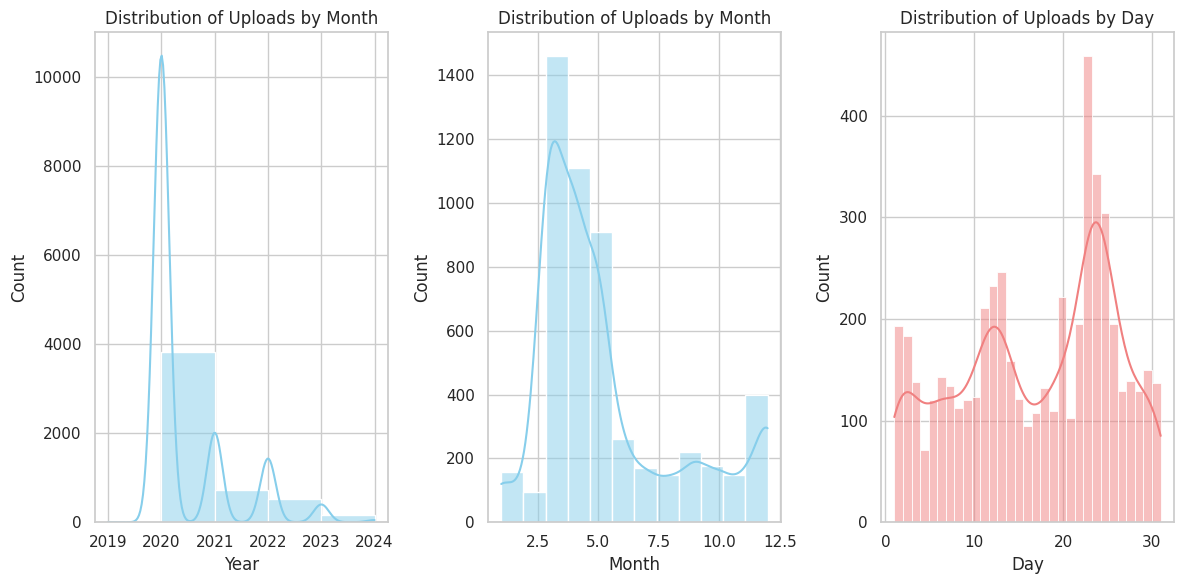

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Your data
data = news_all
# Convert 'Upload Date' to datetime format
#data['Upload Date'] = pd.to_datetime(data['Upload Date'])
# Convert '작성날짜' column to datetime format
data['Upload Date'] = pd.to_datetime(data['Upload Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')



# Create a new column for month and day
#data['Year'] = data['Upload Date'].dt.year
#data['Month'] = data['Upload Date'].dt.month
#data['Day'] = data['Upload Date'].dt.day


data['Year'] = data['Upload Date'].dt.year
data['Month'] = data['Upload Date'].dt.month
data['Day'] = data['Upload Date'].dt.day
# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

#연도별

plt.subplot(1, 3, 1)
sns.histplot(data['Year'], kde=True, bins=5, color='skyblue')
plt.title('Distribution of Uploads by Month')

# 월별
plt.subplot(1, 3, 2)
sns.histplot(data['Month'], kde=True, bins=12, color='skyblue')
plt.title('Distribution of Uploads by Month')

# 일별
plt.subplot(1, 3, 3)
sns.histplot(data['Day'], kde=True, bins=31, color='lightcoral')
plt.title('Distribution of Uploads by Day')

plt.tight_layout()
plt.show()


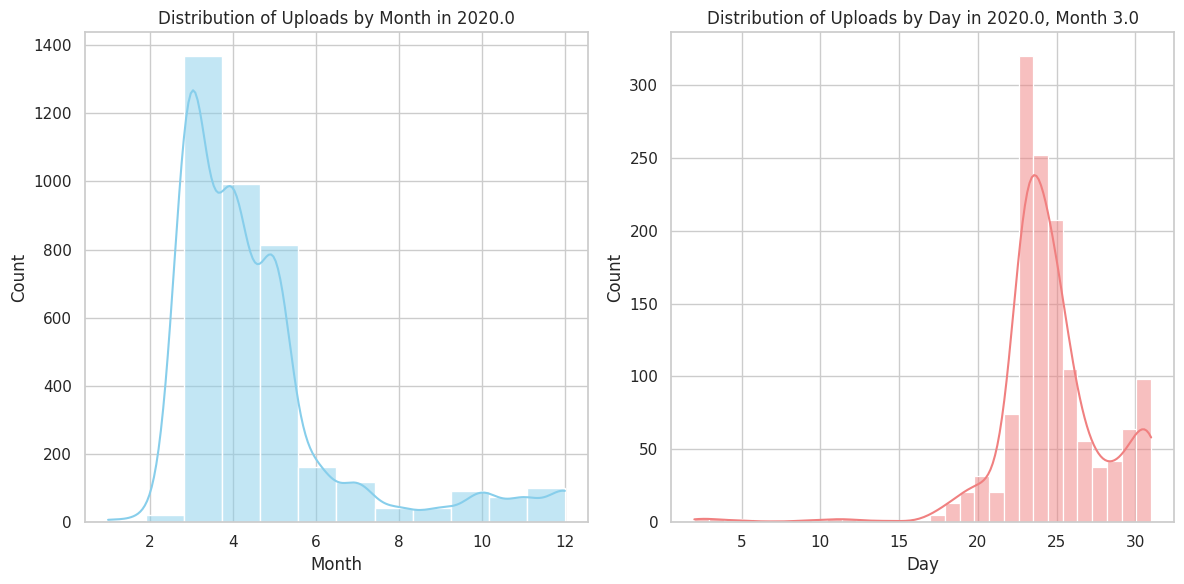

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Your data
data = news_all

# Convert 'Upload Date' to datetime format
data['Upload Date'] = pd.to_datetime(data['Upload Date'])

# Extract year, month, and day
data['Year'] = data['Upload Date'].dt.year
data['Month'] = data['Upload Date'].dt.month
data['Day'] = data['Upload Date'].dt.day

# Find the year with the highest concentration of uploads
most_common_year = data['Year'].mode().iloc[0]

# Filter data for the most common year
most_common_year_data = data[data['Year'] == most_common_year]

# Plotting
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Distribution of uploads by month for the most common year
plt.subplot(1, 2, 1)
sns.histplot(most_common_year_data['Month'], kde=True, bins=12, color='skyblue')
plt.title(f'Distribution of Uploads by Month in {most_common_year}')

# Distribution of uploads by day for the most common year and month
most_common_month = most_common_year_data['Month'].mode().iloc[0]
most_common_month_data = most_common_year_data[most_common_year_data['Month'] == most_common_month]

plt.subplot(1, 2, 2)
sns.histplot(most_common_month_data['Day'], kde=True, bins=31, color='lightcoral')
plt.title(f'Distribution of Uploads by Day in {most_common_year}, Month {most_common_month}')

plt.tight_layout()
plt.show()


In [13]:
print('most_common_year : ', most_common_year)
print('most_common_month : ', most_common_month)

most_common_year :  2020.0
most_common_month :  3.0


## most_common_year 행만 추출

In [14]:
# Convert 'Upload Date' to datetime format
data['Upload Date'] = pd.to_datetime(data['Upload Date'])

# Extract year, month, and day
data['Year'] = data['Upload Date'].dt.year

# Find the year with the highest concentration of uploads
most_common_year = data['Year'].mode().iloc[0]

# Extract rows corresponding to the most common year
#유튜브 n번방
most_common_year_data = data[(data['Year'] == most_common_year) & ((data['Month'] == 3)|(data['Month'] == 4)|(data['Month'] == 5))]

#유튜브 원숭이두창
#most_common_year_data = data[(data['Year'] == most_common_year) & ((data['Month'] == 5)|(data['Month'] == 6)|(data['Month'] == 7))]
#most_common_year_data = data[(data['Year'] == most_common_year) & ((data['Month'] == 5)|(data['Month'] == 6)|(data['Month'] == 7)|(data['Month'] == 8))]
#most_common_year_data = data[(data['Year'] == most_common_year) & (data['Month'] == 6)]
print(most_common_year_data)

                                                    URL  \
0     https://n.news.naver.com/mnews/article/016/000...   
1     https://n.news.naver.com/mnews/article/020/000...   
2     https://n.news.naver.com/mnews/article/011/000...   
3     https://n.news.naver.com/mnews/article/003/000...   
5     https://n.news.naver.com/mnews/article/417/000...   
...                                                 ...   
5486  https://n.news.naver.com/mnews/article/417/000...   
5487  https://n.news.naver.com/mnews/article/003/000...   
5488  https://n.news.naver.com/mnews/article/056/001...   
5489  https://n.news.naver.com/mnews/article/277/000...   
5490  https://n.news.naver.com/mnews/article/028/000...   

                                                   link         Upload Date  \
0     https://n.news.naver.com/mnews/article/016/000... 2020-04-13 09:38:05   
1     https://n.news.naver.com/mnews/article/020/000... 2020-04-02 03:04:09   
2     https://n.news.naver.com/mnews/article/011/000..

In [15]:
print(most_common_year_data)

                                                    URL  \
0     https://n.news.naver.com/mnews/article/016/000...   
1     https://n.news.naver.com/mnews/article/020/000...   
2     https://n.news.naver.com/mnews/article/011/000...   
3     https://n.news.naver.com/mnews/article/003/000...   
5     https://n.news.naver.com/mnews/article/417/000...   
...                                                 ...   
5486  https://n.news.naver.com/mnews/article/417/000...   
5487  https://n.news.naver.com/mnews/article/003/000...   
5488  https://n.news.naver.com/mnews/article/056/001...   
5489  https://n.news.naver.com/mnews/article/277/000...   
5490  https://n.news.naver.com/mnews/article/028/000...   

                                                   link         Upload Date  \
0     https://n.news.naver.com/mnews/article/016/000... 2020-04-13 09:38:05   
1     https://n.news.naver.com/mnews/article/020/000... 2020-04-02 03:04:09   
2     https://n.news.naver.com/mnews/article/011/000..

In [16]:
#분석할 데이터 프레임 명을 news_all로 변경
news_all = most_common_year_data

# 전처리

## 명사추출

In [17]:
#형태소분석기 호출★
from kiwipiepy import Kiwi
kiwi = Kiwi()

In [18]:
#특수기호 제거
pattern1 = '[-=+,#/\?:;^$.A*"~%!\\\n\r\t<>[]{}()▼▽♣♧§☆♡´∀｀ﾉ♥♡▲△�ㅁ▼▽▶▷◀◁★☆♠♤●○◎⊙◆◇■□＊━▣“”]' #특수기호 목록
news_all['제목']=news_all['제목'].progress_map(lambda x:re.sub(pattern1, ' ', x).strip())  # 특수 기호를 " " 공란으로

100%|██████████| 3174/3174 [00:00<00:00, 336817.73it/s]
<ipython-input-18-caa9287a7c7e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_all['제목']=news_all['제목'].progress_map(lambda x:re.sub(pattern1, ' ', x).strip())  # 특수 기호를 " " 공란으로


In [19]:
kiwi.analyze('금잔디에 가면 볶음우동을 먹을 수 있어요')

[([Token(form='금잔디', tag='NNP', start=0, len=3),
   Token(form='에', tag='JKB', start=3, len=1),
   Token(form='가', tag='VV', start=5, len=1),
   Token(form='면', tag='EC', start=6, len=1),
   Token(form='볶음', tag='NNG', start=8, len=2),
   Token(form='우동', tag='NNG', start=10, len=2),
   Token(form='을', tag='JKO', start=12, len=1),
   Token(form='먹', tag='VV', start=14, len=1),
   Token(form='을', tag='ETM', start=15, len=1),
   Token(form='수', tag='NNB', start=17, len=1),
   Token(form='있', tag='VA', start=19, len=1),
   Token(form='어요', tag='EF', start=20, len=2)],
  -68.07340240478516)]

In [20]:
 #명사 추출 함수 (kiwi 0.10.0)
 def get_noun(texts):
    res = kiwi.analyze(texts)[0][0]
    return [Token[0]
            for Token in res
            if Token[1]=='NNG' or Token[1]=='NNP']

#함수 동작 체크
get_noun('금잔디에 가면 볶음우동을 먹을 수 있어요')

['금잔디', '볶음', '우동']

**부가설명**

Kiwi는 List[Tuple[List[Tuple[형태소, 품사태그, 시작위치, 문자열길이]], 분석 점수]] 형태로 분석 결과를 출력합니다.

맨 바깥 리스트에서 res라는 변수를 생성하고(Line 2), 이를 활용하여 품사 태그가 NNG(명사) 혹은 NNP(고유명사)인 형태소만을 리스트 형태로 반환합니다(Line 3~5).

참고로 Kiwi의 품사 태그는 Sejong의 것과 동일합니다.

In [21]:
# 최초 형태소 분석★
# 전처리 후 다시 형태소분석을 진행할 때도 이 셀을 실행해주세요.
news_all['nouns'] = news_all['제목'].progress_map(lambda x:get_noun(x))

100%|██████████| 3174/3174 [00:08<00:00, 364.41it/s]
<ipython-input-21-d06654356769>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_all['nouns'] = news_all['제목'].progress_map(lambda x:get_noun(x))


In [22]:
#결과 확인
news_all.head()

,URL,link,Upload Date,제목,언론사,댓글수,Year,Month,Day,nouns
0,https://n.news.naver.com/mnews/article/016/000...,https://n.news.naver.com/mnews/article/016/000...,2020-04-13 09:38:05,"검찰, 오늘 조주빈 구속기소… 범죄수익 추징 등 보강수사 계속",헤럴드경제,NaN,2020.0,4.0,13.0,"[검찰, 오늘, 조, 주빈, 구속, 기소, 범죄, 수익, 추징, 보강, 수사]"
1,https://n.news.naver.com/mnews/article/020/000...,https://n.news.naver.com/mnews/article/020/000...,2020-04-02 03:04:09,‘박사방’ 영상 재유포자도 수사 착수,동아일보,0,2020.0,4.0,2.0,"[박사, 방, 영상, 재유포자, 수사, 착수]"
2,https://n.news.naver.com/mnews/article/011/000...,https://n.news.naver.com/mnews/article/011/000...,2020-04-07 21:18:03,"경찰, 조주빈 공범 ‘부따’ 구속영장 신청",서울경제,0,2020.0,4.0,7.0,"[경찰, 조주, 공범, 부따, 구속, 영장, 신청]"
3,https://n.news.naver.com/mnews/article/003/000...,https://n.news.naver.com/mnews/article/003/000...,2020-05-14 11:07:51,"완장방·주홍글씨 운영자 '미희', 구속심사 16분만 종료(종합)",뉴시스,2,2020.0,5.0,14.0,"[완장, 방, 주홍글씨, 운영자, 미희, 구속, 심사, 종료, 종합]"
5,https://n.news.naver.com/mnews/article/417/000...,https://n.news.naver.com/mnews/article/417/000...,2020-05-04 14:19:14,"텔레그램 박사방 ‘이기야’ 이원호 일병, 법정 선다",머니S,3,2020.0,5.0,4.0,"[텔레그램, 박사, 방, 이기야, 이원호, 일병, 법정]"


In [23]:
news_all['nouns']

0             [검찰, 오늘, 조, 주빈, 구속, 기소, 범죄, 수익, 추징, 보강, 수사]
1                               [박사, 방, 영상, 재유포자, 수사, 착수]
2                            [경찰, 조주, 공범, 부따, 구속, 영장, 신청]
3                  [완장, 방, 주홍글씨, 운영자, 미희, 구속, 심사, 종료, 종합]
5                         [텔레그램, 박사, 방, 이기야, 이원호, 일병, 법정]
                              ...                        
5486                                 [박사, 방, 조주빈, 공판, 개시]
5487                           [방, 박사, 방, 이번, 박멸, 경찰, 명운]
5488          [검찰, 박사, 방, 조주, 소환, 조사, 수사, 상황, 이례, 공개, 방침]
5489    [검찰, 박사, 방, 조주빈, 신상, 정보, 수사, 상황, 공개, 키로, 전날, 심...
5490                                  [사회, 거대, 방, 언론, 보도]
Name: nouns, Length: 3174, dtype: object



> 전처리 반복


다음 과정을 아주 많이 반복합니다:

1. 일부 아이템을 랜덤하게 추출하여 확인
1.   정규화
2.   커스텀 사전 추가
3.   불용어 제거
4.   다시 형태소분석
















**기사 랜덤 추출**

## 커스텀사전

In [24]:
#카운터 리셋
counter=0

In [25]:
i = random.randint(0, len(news_all))


print("article {}".format(i)) #인덱스 번호
print(news_all.iloc[i][['제목','nouns']].values[0]) #기사 본문
print(news_all.iloc[i][['제목','nouns']].values[1]) #생성된 토큰
counter+=1


print('counter:{}'.format(counter))

article 3127
남의 불행 볼 땐 즐거웠지? '박사방' 수사 압박에 유료회원 3명 자수
['남', '불행', '때', '박사', '방', '수사', '압박', '유료', '회원', '자수']
counter:1


In [26]:
#커스텀 사전★
word_list=['CNN','박사방','랜덤채팅','처벌법','불법합성','민식이법',\
           '재개정','미성년','국제단체','박지현','지인능욕','개미귀신','부산여성단체','국회청원','이기야','성착취범','구속영장','운영진','10대','기본권','10대','완장방','무방비','운영자','인권센터','직촬방','내부고발','국제공조수사','BBC','SNS','양형위원장','도용','국내기업','이루다','전원조사','관전자','경남상시혐','속도','국수본부장','의제강간연령','구속영장','신지예','민생당','사이버팀','강제추행','실효성','신상공개','승적','특별조사팀','AI','아동청소년','영화화','성노예화','아동청소년성보호','정승민','자처','재난지원금','범죄단체조직죄','주민번호','구속영장',\
    "산·학",'김유빈','창X들','성착취','IP','박사방','능욕방','제2의','대학생','시민방범대','소통령','협박죄','예비후보','엄중처벌','교사단체','공인요원','신상공개','주거침입강제추행죄','여성의당','통합당',
           '불법촬영물','박사방','신상공개','그루밍','성범죄물','물차별','미성년자','착취범','처벌강화법','무법천지','종족주의','2차','양성희','위장수사','제2','재발','비윤리성','문형욱','무기징역','내주',\
           'n번방','N번방','국민여론','무기징역형','유료회원','아·청','그알','최진성','무죄','국민참여재판','재판','범죄추적극','엘','N번방','국민청원','오덕식',\
           '성착취물','단순소지','디지털성범죄물','방지방법원','국무회의','촬영물','SNS','성평등선대본','임시국회','박사방','조직죄','범죄단체','조주빈','개설자','경찰조사','갓갓',\
           '심바','강력처벌','JMS','처벌촉구','신상공개','디지털성범죄','법정최고형','반일','이우연','양형기준','솜방망이처벌','나체사진','불법촬영물','기자회견','여성후보','상무위원회','동물판']

In [27]:
# Remove duplicates while preserving the order
unique_word_list = list(dict.fromkeys(word_list))

# Print the result
print(unique_word_list)

['CNN', '박사방', '랜덤채팅', '처벌법', '불법합성', '민식이법', '재개정', '미성년', '국제단체', '박지현', '지인능욕', '개미귀신', '부산여성단체', '국회청원', '이기야', '성착취범', '구속영장', '운영진', '10대', '기본권', '완장방', '무방비', '운영자', '인권센터', '직촬방', '내부고발', '국제공조수사', 'BBC', 'SNS', '양형위원장', '도용', '국내기업', '이루다', '전원조사', '관전자', '경남상시혐', '속도', '국수본부장', '의제강간연령', '신지예', '민생당', '사이버팀', '강제추행', '실효성', '신상공개', '승적', '특별조사팀', 'AI', '아동청소년', '영화화', '성노예화', '아동청소년성보호', '정승민', '자처', '재난지원금', '범죄단체조직죄', '주민번호', '산·학', '김유빈', '창X들', '성착취', 'IP', '능욕방', '제2의', '대학생', '시민방범대', '소통령', '협박죄', '예비후보', '엄중처벌', '교사단체', '공인요원', '주거침입강제추행죄', '여성의당', '통합당', '불법촬영물', '그루밍', '성범죄물', '물차별', '미성년자', '착취범', '처벌강화법', '무법천지', '종족주의', '2차', '양성희', '위장수사', '제2', '재발', '비윤리성', '문형욱', '무기징역', '내주', 'n번방', 'N번방', '국민여론', '무기징역형', '유료회원', '아·청', '그알', '최진성', '무죄', '국민참여재판', '재판', '범죄추적극', '엘', '국민청원', '오덕식', '성착취물', '단순소지', '디지털성범죄물', '방지방법원', '국무회의', '촬영물', '성평등선대본', '임시국회', '조직죄', '범죄단체', '조주빈', '개설자', '경찰조사', '갓갓', '심바', '강력처벌', 'JMS', '처벌촉구', '디지털성범죄', '법정최고형', '반일', '이우연', '양형

In [28]:
#커스텀 사전 리스트를 dataframe형태로 변환
custom_dict = pd.DataFrame({"word":unique_word_list})

#품사태그는 고유명사로 지정
custom_dict['morp']="NNP"

#Kiwi는 우선순위를 부여하기 위해 score개념이 존재합니다. 커스텀 단어를 우선 활용하기 위해 score값에 1을 부여.
custom_dict['score']=1

#데이터 확인
custom_dict.head()

,word,morp,score
0,CNN,NNP,1
1,박사방,NNP,1
2,랜덤채팅,NNP,1
3,처벌법,NNP,1
4,불법합성,NNP,1


In [29]:
#커스텀 사전을 csv로 저장하고 불러옴★
custom_dict.to_csv("/content/drive/MyDrive/2023 겨울계절 URP/데이터_수집/custom_dict.txt", index=False, header=False, sep="\t",encoding='UTF-8')

In [30]:
#kiwi의 load_user_dictionary는 커스텀 사전을 변경할 경우 업데이트된 단어의 수를 반환해 줍니다.
kiwi.load_user_dictionary('/content/drive/MyDrive/2023 겨울계절 URP/데이터_수집/custom_dict.txt')

129

In [31]:
# 최초 형태소 분석★
# 전처리 후 다시 형태소분석을 진행할 때도 이 셀을 실행해주세요.
news_all['nouns'] = news_all['제목'].progress_map(lambda x:get_noun(x))

100%|██████████| 3174/3174 [00:12<00:00, 264.28it/s]
<ipython-input-31-d06654356769>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_all['nouns'] = news_all['제목'].progress_map(lambda x:get_noun(x))


## **단어정규화 딕셔너리**

In [32]:
#카운터 리셋
counter=0

In [33]:
i = random.randint(0, len(news_all))

print("article {}".format(i)) #인덱스 번호
print(news_all.iloc[i][['제목','nouns']].values[0]) #기사 본문
print(news_all.iloc[i][['제목','nouns']].values[1]) #생성된 토큰
counter+=1
print('counter:{}'.format(counter))

article 507
'갓갓' 문형욱, '대구 여고생 성폭행' 피해자 엄마에 딸 성착취 영상 보내 협박
['갓갓', '문형욱', '대구', '여고', '성폭행', '피해자', '엄마', '딸', '성착취', '영상', '협박']
counter:1


* 정규화: 동일한 표현을 다르게 쓴 것을 모두 통일해주는 것
영어 약자, 유행병 이름, 사람 이름, 한자 및 영어 표현 등 수작업으로 교체하여 분류 정확도 높이기

In [34]:
#정규화 딕셔너리 ★
dic_standardization={'法':'법원','미성년':'미성년자','스타':'연예인','엑소':"연예인",'유사':'제2','재발':'제2',\
                     '문':'문재인','남성':'남자','檢·警':'검·경','성착취범':'성착취','제2의':'제2','붓다':'부따',\
                     '박사':'박사방','男':'남자','신상':'신상공개','공개':'신상공개','性':'성','代':'대','부대':'군대','육군':'군대','일병':'군대',\
                     '디지털성범죄':'디지털성범죄물','디지털':'디지털성범죄물','성착취물':'성착취','착취물':'성착취','中':'중국','靑':'청와대','文':'문재인','★':'연예인','무기징역형':'무기징역','女':'여자',\
                     '그알':'그것이알고싶다','n번방':'N번방','軍':'군','檢':'검사','韓':'한국','與':'여당','野':'야당','北':'북한','(脫)':'','(非)':'','(正常)':''}

In [35]:
#정규화 딕셔너리를 활용하여 단어 교체★
for old, new in dic_standardization.items():
  print("convert {} into {}.".format (old, new))
  news_all['제목'] = news_all['제목'].progress_map(lambda x:x.replace(old, new))

convert 法 into 법원.


100%|██████████| 3174/3174 [00:00<00:00, 189815.65it/s]
<ipython-input-35-3c8aafef5074>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_all['제목'] = news_all['제목'].progress_map(lambda x:x.replace(old, new))


convert 미성년 into 미성년자.


100%|██████████| 3174/3174 [00:00<00:00, 181007.25it/s]


convert 스타 into 연예인.


100%|██████████| 3174/3174 [00:00<00:00, 154445.29it/s]


convert 엑소 into 연예인.


100%|██████████| 3174/3174 [00:00<00:00, 192773.15it/s]


convert 유사 into 제2.


100%|██████████| 3174/3174 [00:00<00:00, 135738.82it/s]


convert 재발 into 제2.


100%|██████████| 3174/3174 [00:00<00:00, 210731.01it/s]


convert 문 into 문재인.


100%|██████████| 3174/3174 [00:00<00:00, 256141.93it/s]


convert 남성 into 남자.


100%|██████████| 3174/3174 [00:00<00:00, 173281.80it/s]


convert 檢·警 into 검·경.


100%|██████████| 3174/3174 [00:00<00:00, 80684.13it/s]


convert 성착취범 into 성착취.


100%|██████████| 3174/3174 [00:00<00:00, 125905.28it/s]


convert 제2의 into 제2.


100%|██████████| 3174/3174 [00:00<00:00, 173498.60it/s]


convert 붓다 into 부따.


100%|██████████| 3174/3174 [00:00<00:00, 64255.24it/s]


convert 박사 into 박사방.


100%|██████████| 3174/3174 [00:00<00:00, 138941.93it/s]


convert 男 into 남자.


100%|██████████| 3174/3174 [00:00<00:00, 117345.42it/s]


convert 신상 into 신상공개.


100%|██████████| 3174/3174 [00:00<00:00, 183813.89it/s]

convert 공개 into 신상공개.

100%|██████████| 3174/3174 [00:00<00:00, 130456.76it/s]


convert 性 into 성.


100%|██████████| 3174/3174 [00:00<00:00, 113196.67it/s]


convert 代 into 대.


100%|██████████| 3174/3174 [00:00<00:00, 139520.02it/s]


convert 부대 into 군대.


100%|██████████| 3174/3174 [00:00<00:00, 148805.34it/s]


convert 육군 into 군대.


100%|██████████| 3174/3174 [00:00<00:00, 149539.13it/s]


convert 일병 into 군대.


100%|██████████| 3174/3174 [00:00<00:00, 197770.46it/s]


convert 디지털성범죄 into 디지털성범죄물.


100%|██████████| 3174/3174 [00:00<00:00, 188333.37it/s]

convert 디지털 into 디지털성범죄물.

100%|██████████| 3174/3174 [00:00<00:00, 221226.06it/s]


convert 성착취물 into 성착취.


100%|██████████| 3174/3174 [00:00<00:00, 259229.30it/s]


convert 착취물 into 성착취.


100%|██████████| 3174/3174 [00:00<00:00, 132935.78it/s]


convert 中 into 중국.


100%|██████████| 3174/3174 [00:00<00:00, 114276.21it/s]


convert 靑 into 청와대.


100%|██████████| 3174/3174 [00:00<00:00, 224463.76it/s]


convert 文 into 문재인.


100%|██████████| 3174/3174 [00:00<00:00, 167634.84it/s]


convert ★ into 연예인.


100%|██████████| 3174/3174 [00:00<00:00, 254837.69it/s]


convert 무기징역형 into 무기징역.


100%|██████████| 3174/3174 [00:00<00:00, 105023.87it/s]


convert 女 into 여자.


100%|██████████| 3174/3174 [00:00<00:00, 87459.41it/s]


convert 그알 into 그것이알고싶다.


100%|██████████| 3174/3174 [00:00<00:00, 96264.60it/s]


convert n번방 into N번방.


100%|██████████| 3174/3174 [00:00<00:00, 188843.64it/s]


convert 軍 into 군.


100%|██████████| 3174/3174 [00:00<00:00, 258941.90it/s]


convert 檢 into 검사.


100%|██████████| 3174/3174 [00:00<00:00, 273272.04it/s]


convert 韓 into 한국.


100%|██████████| 3174/3174 [00:00<00:00, 226314.44it/s]


convert 與 into 여당.


100%|██████████| 3174/3174 [00:00<00:00, 244064.11it/s]


convert 野 into 야당.


100%|██████████| 3174/3174 [00:00<00:00, 96802.89it/s]


convert 北 into 북한.


100%|██████████| 3174/3174 [00:00<00:00, 123520.98it/s]


convert (脫) into .


100%|██████████| 3174/3174 [00:00<00:00, 174165.93it/s]


convert (非) into .


100%|██████████| 3174/3174 [00:00<00:00, 184029.87it/s]


convert (正常) into .


100%|██████████| 3174/3174 [00:00<00:00, 233827.25it/s]


## **불용어 제거**


---


불용어는 분석에 사용되지 않을 단어를 의미합니다. 다음 유형의 단어를 제거하였습니다:

1. 자연어처리 시 통용되는 불용어 리스트
2. 너무 많이 등장하는 단어들 - 모든 문서에서 공통적으로 등장하여 분류 성능을 낮출 우려가 있음.
한 단어로 된 단어
3. 토픽 특성상 핵심 주제어인 '원전' '원자력발전'도 제거하는 게 좋음

In [36]:
#1차 필터링: 한국어 불용어 사전 활용★
stop_list1 = open('/content/drive/MyDrive/2023 겨울계절 URP/코드/재희/토픽모델링/stopword.txt', encoding = 'utf-8')


lines1 = stop_list1.readlines() #한 줄마다 읽어옴


stopwords = [] #불용어 리스트
for line in lines1:
    a= line.split() #줄 단위 분할
    stopwords.append(a) #한 줄마다 불용어 리스트에 추가


In [37]:
i = random.randint(0, len(news_all))

print("article {}".format(i)) #인덱스 번호
print(news_all.iloc[i][['제목','nouns']].values[0]) #기사 본문
print(news_all.iloc[i][['제목','nouns']].values[1]) #생성된 토큰
counter+=1
print('counter:{}'.format(counter))

article 2471
“Cho Ju-bin, South Korea”…영국 BBC도 N번방 사건 관심 보도
['영국', 'BBC', 'n번방', '사건', '관심', '보도']
counter:2


In [38]:
#2차 필터링: 커스텀 불용어 리스트★
custom_stopwords = ['뉴스큐','중심','시선','무플방지','취재','사건','강력','사설','브리핑','오디오래빗','양성희','취중','이동','정면','승부','논설위원','확대경','한마당','마당','통과','밑줄','처리','가능','심층','현장','연결','인터뷰','속보','이데일리','대상','발언','관련','영상','황출새','타임라인','착취','뉴스','핫클릭','보도자료','뉴스하이킥','종합','사사건건','영상','지금','단독','이번','뉴구세요','포토','오늘','물','뉴스큐','이슈와치','단독','초점','이슈','관련','한국','이날','발생','이후','이번','오후','오전','가운데','기자','사진','최근','정부','나이트포커스','정승민']
stopwords+=custom_stopwords #커스텀 불용어를 리스트에 추가

In [39]:
#'불용어 리스트에 없는'형태소만 남기는 방식으로 불용어 제거★
news_all['nouns'] = news_all['nouns'].progress_map(lambda x:[w for w in x if w not in stopwords])

100%|██████████| 3174/3174 [00:01<00:00, 3171.38it/s]
<ipython-input-39-0724f6fa9bb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_all['nouns'] = news_all['nouns'].progress_map(lambda x:[w for w in x if w not in stopwords])


In [40]:
#3차 필터링: 한 글자 제거★
news_all['nouns'] = news_all['nouns'].progress_map(lambda x:[w for w in x if len(w) > 1])

100%|██████████| 3174/3174 [00:00<00:00, 161172.91it/s]
<ipython-input-40-128724ea1ca8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  news_all['nouns'] = news_all['nouns'].progress_map(lambda x:[w for w in x if len(w) > 1])


In [41]:
#print(news_all.iloc[3502][['제목','nouns']].values[1]) #기사 본문

In [42]:
#단어 빈도 파악
nouncounter=news_all['nouns'].sum() #형태소 목록 병합
counts = collections.Counter(nouncounter) #병합된 목록 카운트
print(counts) #결과

Counter({'n번방': 2076, '갓갓': 449, '텔레그램': 392, '처벌': 330, 'N번방': 272, '박사방': 255, '조주빈': 242, '방지법': 233, '경찰': 200, '국회': 199, '신상공개': 185, '수사': 183, '공개': 159, '검거': 137, '공범': 135, '문형욱': 128, '운영자': 121, '가해자': 121, '구속': 120, '성범죄': 114, '성착취': 109, '피해자': 109, '박사': 108, '회원': 102, '전원': 98, '촉구': 97, '범죄': 96, '황교안': 91, '개설자': 89, '디지털': 86, '신상': 84, '추적': 83, '여성': 82, '검찰': 81, '청원': 79, '논란': 75, '대통령': 75, '성착취물': 73, '얼굴': 72, '조사': 72, '통합당': 63, '분노': 61, '호기심': 60, '본회의': 59, '방지': 58, '대책': 56, '징역': 56, '대학생': 55, '국민청원': 55, '국민': 54, '영장': 53, '여야': 52, '강화': 52, '정의당': 50, '법안': 48, '결정': 47, '입법': 47, '최초': 47, '정치': 46, '필요': 44, '켈리': 44, '피해': 43, '피의자': 43, '유포': 41, '심사': 39, '재발': 39, '유료회원': 38, '적용': 38, '판사': 38, '총선': 38, '디지털성범죄': 38, '우려': 37, '엄벌': 37, '부따': 35, '혐의': 35, '인터넷': 34, '운영': 34, '강훈': 33, '조국': 33, '가담자': 33, '사람': 33, '긴급': 33, '마지막': 33, '논의': 33, '음란물': 31, '악마': 31, '남성': 31, '법사위': 31, '돌파': 31, '미성년자': 30, '처벌법': 30, '오덕식': 30, '민

In [43]:
news_all['nouns']

0                   [검찰, 조주빈, 구속, 기소, 범죄, 수익, 추징, 보강, 수사]
1                                     [박사방, 재유포자, 수사, 착수]
2                             [경찰, 조주빈, 공범, 부따, 구속영장, 신청]
3                        [완장방, 주홍글씨, 운영자, 미희, 구속, 심사, 종료]
5                           [텔레그램, 박사방, 이기야, 이원호, 일병, 법정]
                              ...                        
5486                                   [박사방, 조주빈, 공판, 개시]
5487                               [n번방, 박사방, 박멸, 경찰, 명운]
5488           [검찰, 박사방, 조주빈, 소환, 조사, 수사, 상황, 이례, 공개, 방침]
5489    [검찰, 박사방, 조주빈, 신상, 정보, 수사, 상황, 공개, 키로, 전날, 심의위...
5490                                [사회, 거대, n번방, 언론, 보도]
Name: nouns, Length: 3174, dtype: object

In [44]:
processed_data=[]
df=news_all

# Iterate through the DataFrame
for index, row in df.iterrows():
    nouns_list = row['nouns']
    processed_data.append(nouns_list)


In [45]:
processed_data

[['검찰', '조주빈', '구속', '기소', '범죄', '수익', '추징', '보강', '수사'],
 ['박사방', '재유포자', '수사', '착수'],
 ['경찰', '조주빈', '공범', '부따', '구속영장', '신청'],
 ['완장방', '주홍글씨', '운영자', '미희', '구속', '심사', '종료'],
 ['텔레그램', '박사방', '이기야', '이원호', '일병', '법정'],
 ['박사방', '공동', '운영자', '이기야', '구속', '전화', '성착취', '발견'],
 ['조주빈', '공범', '현역', '군인', '이기야', '구속', '증거', '인멸', '도주', '우려'],
 ['n번방', '회원', '노예', '주홍글씨', '운영자', '미희', '법원', '출석'],
 ['성착취물', '조주빈', '공범', '육군', '일병', '이기야', '신상공개', '결정'],
 ['박사방', '이기야', '이원호', '일병'],
 ['n번방', '개설자', '갓갓', '신상공개', '대학생', '문형욱'],
 ['n번방', '갓갓', '문형욱', '얼굴', '공개', '검찰', '송치'],
 ['n번방', '원조', '갓갓', '구속', 'n번방', '폭로', '주홍글씨', '운영자', '성착취'],
 ['n번방', '개설자', '갓갓', '구속', '신상공개'],
 ['추징금', '버티기', '독립', '몰수', '필요', '범죄', '수익', '환수', '하세월'],
 ['정우', '송환', '논란', '솜방망이', '처벌', '방증', '정비'],
 ['한경대', '재학', '갓갓', '문형욱', '퇴학', '고려'],
 ['갓갓', '문형욱', '고백', '대구', '여고', '성폭행'],
 ['조주빈', '재판', '유료회원', '갓갓', '직촬방'],
 ['사마귀', '경찰', '조주빈', '공범', '추적'],
 ['얼굴', '강훈', '진심', '시위', '여성', '가해자', '신상', '공개'],
 ['텔레그램', 

# LDA



```
# processed_data=[['스위트', '새벽', '시간'],
 ['스위트', '송강'],
 ['스위트', '스위트', '나용'],
 ['스위트'],
 ['스위트'],
 ['앞자리', ...
```



##필요한 모듈 import



In [46]:
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric

import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)




##모델링


* 📌 num_topics: 생성될 토픽의 개수
* 📌 chunksize: 한번의 트레이닝에 처리될 문서의 개수
* 📌 passes: 전체 코퍼스 트레이닝 횟수
* 📌 interations: 문서 당 반복 횟수

`class gensim.models.ldamodel.LdaModel(corpus=None, num_topics=100, id2word=None, distributed=False, chunksize=2000, passes=1, update_every=1, alpha='symmetric', eta=None, decay=0.5, offset=1.0, eval_every=10, iterations=50, gamma_threshold=0.001, minimum_probability=0.01, random_state=None, ns_conf=None, minimum_phi_value=0.01, per_word_topics=False, callbacks=None, dtype=<class 'numpy.float32'>)`

물론 이 파라미터를 다른 숫자로 여러번 해서 가장 정확도 높은 모델을 선택하는 것이 가장 좋습니다. 모델의 정확도는 토픽의 일관성으로도 볼 수 있을텐데, 토픽의 일관성은 Coherence를 보면 됩니다. 파라미터 eval_every=1로 설정하여, 매 pass마다 문서의 Convergence 평가하고, 대부분의 문서가 포함되는 pass를 선정할 수도 있습니다.

Number of unique tokens: 324
Number of documents: 3174


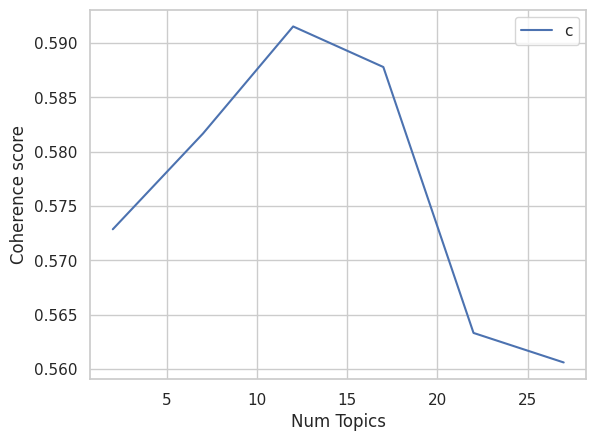

In [47]:
# -*- coding: utf-8 -*-
from konlpy.tag import Mecab
from tqdm import tqdm
import re
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric
import logging
import pickle
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics,passes=10)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values


def find_optimal_number_of_topics(dictionary, corpus, processed_data):
    limit = 30;
    start = 2;
    step = 5;

    model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=processed_data, start=start, limit=limit, step=step)

    x = range(start, limit, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

if __name__ == '__main__':
    #processed_data = [sent.strip().split(",") for sent in tqdm(open('./data/tokenized_data.csv', 'r', encoding='utf-8').readlines())]

    # 정수 인코딩과 빈도수 생성
    dictionary = corpora.Dictionary(processed_data)

    # 출현빈도가 적거나 자주 등장하는 단어는 제거
    # no_below: 적어도 n개 이상의 문서에서 등장해야함
    # no_above: n% 이상의 문서에서 등장하면 배제함.

    dictionary.filter_extremes(no_below=10, no_above=0.025)
    corpus = [dictionary.doc2bow(text) for text in processed_data]
    print('Number of unique tokens: %d' % len(dictionary))
    print('Number of documents: %d' % len(corpus))

    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

    # 최적의 토픽 수 찾기
    find_optimal_number_of_topics(dictionary, corpus, processed_data)


In [48]:

from konlpy.tag import Mecab
from tqdm import tqdm
import re
from gensim.models.ldamodel import LdaModel
from gensim.models.callbacks import CoherenceMetric
from gensim import corpora
from gensim.models.callbacks import PerplexityMetric
import logging
import pickle
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


if __name__ == '__main__':
    #processed_data = [sent.strip().split(",") for sent in tqdm(open('./data/tokenized_data.csv', 'r', encoding='utf-8').readlines())]

    # 정수 인코딩과 빈도수 생성
    dictionary = corpora.Dictionary(processed_data)

    # 출현빈도가 적거나 자주 등장하는 단어는 제거
    dictionary.filter_extremes(no_below=15, no_above=0.05)
    corpus = [dictionary.doc2bow(text) for text in processed_data]
    print('Number of unique tokens: %d' % len(dictionary))
    print('Number of documents: %d' % len(corpus))

    logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

    # 최적의 토픽 수 찾기 => 14개로 나옴
    # find_optimal_number_of_topics(dictionary, corpus, processed_data)
    # exit()

    perplexity_logger = PerplexityMetric(corpus=corpus, logger='shell')
    coherence_logger = CoherenceMetric(corpus=corpus, coherence="u_mass", logger='shell')

    lda_model = LdaModel(corpus, id2word=dictionary, num_topics=12, passes=30, callbacks=[coherence_logger, perplexity_logger])

    topics = lda_model.print_topics(num_topics=12, num_words=10) #단어 개수 선정

    topic_dict = {}
    for topic in topics:
      topic_num, topic_words = topic
      words_proba = [word.split("*") for word in topic_words.split(" + ")]
      # 비율이 가장 높은 단어를 토픽으로 선정
      max_proba_word = max(words_proba, key=lambda x: float(x[0]))[1].replace('"', '')
      topic_dict[topic_num] = max_proba_word

    print(topic_dict)
    # 각 문서에 대한 토픽 할당
   #doc_topic_assignments = []
    #for doc_bow in corpus:
    #    topic_distribution = lda_model.get_document_topics(doc_bow)
    #    assigned_topic = max(topic_distribution, key=lambda x: x[1])[0]  # 가장 확률이 높은 토픽 선택
    #    doc_topic_assignments.append(assigned_topic)

    # 토픽 할당 값을 DataFrame에 추가
    #df['토픽_할당'] = doc_topic_assignments




    # Compute Coherence Score using c_v
    coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_data, dictionary=dictionary, coherence='c_v')
    coherence_lda = coherence_model_lda.get_coherence()
    print('\nCoherence Score (c_v): ', coherence_lda)


Number of unique tokens: 199
Number of documents: 3174
{0: '박사', 1: '운영자', 2: '검거', 3: '대책', 4: '회원', 5: '범죄', 6: '논란', 7: '공개', 8: '공범', 9: '성범죄', 10: '황교안', 11: '강화'}

Coherence Score (c_v):  0.4912893310176128


In [49]:
len(topic_dict)

12

In [50]:
for i, topic_list in enumerate(lda_model[corpus]):
    if i==5: #일단 5개만 확인
        break
    print(i,'번째 문서의 topic 비율은',topic_list)

0 번째 문서의 topic 비율은 [(0, 0.013889052), (1, 0.3296993), (2, 0.013889173), (3, 0.013889052), (4, 0.013889147), (5, 0.34722292), (6, 0.013889052), (7, 0.013889162), (8, 0.013889546), (9, 0.013889052), (10, 0.1980755), (11, 0.013889052)]
1 번째 문서의 topic 비율은 [(0, 0.04166717), (1, 0.041669413), (2, 0.04166717), (3, 0.04166717), (4, 0.04166717), (5, 0.54165834), (6, 0.04166717), (7, 0.04166717), (8, 0.041667677), (9, 0.04166717), (10, 0.04166717), (11, 0.04166717)]
2 번째 문서의 topic 비율은 [(0, 0.016666768), (1, 0.41666496), (2, 0.016666768), (3, 0.01666697), (4, 0.016666768), (5, 0.016666768), (6, 0.016666768), (7, 0.016666768), (8, 0.4166672), (9, 0.016666768), (10, 0.016666768), (11, 0.016666768)]
3 번째 문서의 topic 비율은 [(0, 0.020833405), (1, 0.5208338), (2, 0.02083365), (3, 0.020833405), (4, 0.020833405), (5, 0.020833405), (6, 0.020833405), (7, 0.020833405), (8, 0.020833405), (9, 0.27083176), (10, 0.020833576), (11, 0.020833405)]
4 번째 문서의 topic 비율은 [(0, 0.02777788), (1, 0.02777788), (2, 0.02777788), 

## LDA모델 결과 df로 저장

In [51]:
#issue='원숭이두창'
issue = 'N번방'


In [52]:
# DataFrame 생성
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
df_results = pd.DataFrame(columns=['토픽 번호', '대표 단어', '대표 단어 확률','튜플 리스트'])

# DataFrame에 데이터 추가
for doc_num, topic_list in enumerate(lda_model[corpus]):
    if doc_num==1:
      break
    for topic_id, weight in topic_list:
        rep_word, word_prob = lda_model.show_topic(topic_id)[0]
        df_results = df_results.append({
            '토픽 번호': topic_id,
            '대표 단어': rep_word,
            '대표 단어 확률': word_prob,
            '튜플 리스트': lda_model.show_topic(topic_id)
        }, ignore_index=True)

# 결과 출력
print(df_results)
LDA_Topic_list=df_results


#csv 저장
LDA_Topic_list.to_csv('/content/drive/MyDrive/2023 겨울계절 URP/데이터_수집/토픽모델링결과/n번방 토큰용.csv',encoding='utf-8-sig',index=False)

   토픽 번호 대표 단어  대표 단어 확률                                             튜플 리스트
0      0    박사  0.261021  [(박사, 0.26102108), (규제, 0.0608537), (징역, 0.051...
1      1   운영자  0.162365  [(운영자, 0.16236539), (구속, 0.11004751), (검찰, 0.0...
2      2    검거  0.215695  [(검거, 0.21569471), (피해자, 0.094777346), (국민, 0....
3      3    대책  0.092788  [(대책, 0.09278828), (본회의, 0.090032), (여야, 0.082...
4      4    회원  0.121926  [(회원, 0.12192633), (대통령, 0.085728705), (성착취, 0...
5      5    범죄  0.126514  [(범죄, 0.126514), (국민청원, 0.10659267), (성착취물, 0....
6      6    논란  0.218907  [(논란, 0.21890664), (총선, 0.11900149), (처벌법, 0.0...
7      7    공개  0.170866  [(공개, 0.17086568), (문형욱, 0.13431524), (가해자, 0....
8      8    공범  0.146161  [(공범, 0.14616132), (청원, 0.123343654), (추적, 0.1...
9      9   성범죄  0.175309  [(성범죄, 0.17530932), (디지털, 0.12907736), (여성, 0....
10    10   황교안  0.138627  [(황교안, 0.13862719), (호기심, 0.09990928), (정의당, 0...
11    11    강화  0.084297  [(강화, 0.08429663), (방지, 0.083753824), (재발, 0.0...


<ipython-input-52-d79cce056c05>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({
<ipython-input-52-d79cce056c05>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({
<ipython-input-52-d79cce056c05>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({
<ipython-input-52-d79cce056c05>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = df_results.append({
<ipython-input-52-d79cce056c05>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_results = 

In [53]:
'''
for i, topic_list in enumerate(lda_model[corpus]):
    if i==1: # 일단 5개만 확인
        break
    print(i, '번째 문서의 topic 비율은', topic_list)

    # 각 주제의 상위 단어와 가중치 출력
    for topic_id, weight in topic_list:
        print(f"Topic {topic_id}:")
        print(lda_model.show_topic(topic_id))  # 해당 주제의 상위 단어 출력
        print("------")
        '''


'\nfor i, topic_list in enumerate(lda_model[corpus]):\n    if i==1: # 일단 5개만 확인\n        break\n    print(i, \'번째 문서의 topic 비율은\', topic_list)\n\n    # 각 주제의 상위 단어와 가중치 출력\n    for topic_id, weight in topic_list:\n        print(f"Topic {topic_id}:")\n        print(lda_model.show_topic(topic_id))  # 해당 주제의 상위 단어 출력\n        print("------")\n        '

In [54]:
'''
for i, topic_list in enumerate(lda_model[corpus]):
    if i==5: # 일단 5개만 확인
        break
    print(i, '번째 문서의 topic 비율은', topic_list)
'''

"\nfor i, topic_list in enumerate(lda_model[corpus]):\n    if i==5: # 일단 5개만 확인\n        break\n    print(i, '번째 문서의 topic 비율은', topic_list)\n"

# 저장하기 위한 df정리

In [55]:
def make_topictable_per_doc(lda_model, corpus):
    topic_table = pd.DataFrame()

    # 몇 번째 문서인지를 의미하는 문서 번호와 해당 문서의 토픽 비중을 한 줄씩 꺼내온다.
    for i, topic_list in enumerate(lda_model[corpus]):
        doc = topic_list[0] if lda_model.per_word_topics else topic_list
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)
        # 각 문서에 대해서 비중이 높은 토픽순으로 토픽을 정렬한다.
        # EX) 정렬 전 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (10번 토픽, 5%), (12번 토픽, 21.5%),
        # Ex) 정렬 후 0번 문서 : (2번 토픽, 48.5%), (8번 토픽, 25%), (12번 토픽, 21.5%), (10번 토픽, 5%)
        # 48 > 25 > 21 > 5 순으로 정렬이 된 것.

        # 모든 문서에 대해서 각각 아래를 수행
        for j, (topic_num, prop_topic) in enumerate(doc): #  몇 번 토픽인지와 비중을 나눠서 저장한다.
            if j == 0:  # 정렬을 한 상태이므로 가장 앞에 있는 것이 가장 비중이 높은 토픽
                topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
                # 가장 비중이 높은 토픽과, 가장 비중이 높은 토픽의 비중과, 전체 토픽의 비중을 저장한다.
            else:
                break
    return(topic_table)


In [56]:
topic_table=make_topictable_per_doc(lda_model, corpus)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
<ipython-input-55-a435ce19ffd3>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
<ipython-input-55-a435ce19ffd3>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
<ipython-input-55-a435ce19ffd3>:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([int(topic_num), round(prop_topic,4), topic_list]), ignore_index=True)
<ipython-input-55-a435ce19ffd3>:16: FutureWarning: The frame.append method is deprecated and will be removed 

In [57]:
def make_topictable_per_doc(lda_model, corpus, topic_dict):
    topic_table = pd.DataFrame()

    for i, topic_list in enumerate(lda_model[corpus]):
        doc = topic_list[0] if lda_model.per_word_topics else topic_list
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0:
                # 가장 비중이 높은 토픽의 대표 단어를 가져옵니다.
                topic_word = topic_dict.get(topic_num, f"Unknown_{topic_num}")
                new_row = pd.Series([topic_word, round(prop_topic, 4), topic_list])
                topic_table = pd.concat([topic_table, new_row.to_frame().T], ignore_index=True)
            else:
                break
    return topic_table


In [58]:
topic_table = make_topictable_per_doc(lda_model, corpus, topic_dict)

각 문서에 기여한 토픽이 있고 다시 그 토픽 안에 기여된 단어들이 있으므로 가장 비율이 높은 토픽의 가장 비율이 높은 단어를 할당해야함

In [59]:
print(topic_table)

        0       1                                                  2
0      범죄  0.3472  [(0, 0.013889052), (1, 0.32970485), (2, 0.0138...
1      범죄  0.5417  [(0, 0.04166717), (1, 0.04166973), (2, 0.04166...
2      공범  0.4167  [(0, 0.016666768), (1, 0.41666496), (2, 0.0166...
3     운영자  0.5208  [(0, 0.020833405), (1, 0.52083385), (2, 0.0208...
4      대책  0.6944  [(0, 0.027777882), (1, 0.027777882), (2, 0.027...
...   ...     ...                                                ...
3169   박사  0.0833  [(0, 0.083333336), (1, 0.083333336), (2, 0.083...
3170   박사  0.0833  [(0, 0.083333336), (1, 0.083333336), (2, 0.083...
3171   공개  0.7708  [(0, 0.020833459), (1, 0.020834945), (2, 0.020...
3172   공개  0.8167  [(0, 0.016666746), (1, 0.016667617), (2, 0.016...
3173  황교안  0.3611  [(0, 0.027778076), (1, 0.027778076), (2, 0.361...

[3174 rows x 3 columns]


In [60]:
#인덱스는 문서번호
import pandas as pd

def make_topictable_per_doc(lda_model, corpus, topic_dict):
    topic_table = pd.DataFrame()

    for i, topic_list in enumerate(lda_model[corpus]):
        doc = topic_list[0] if lda_model.per_word_topics else topic_list
        doc = sorted(doc, key=lambda x: (x[1]), reverse=True)

        for j, (topic_num, prop_topic) in enumerate(doc):
            if j == 0:
                # 가장 비중이 높은 토픽의 대표 단어를 가져옵니다.
                topic_word = topic_dict.get(topic_num, f"Unknown_{topic_num}")
                topic_table = topic_table.append(pd.Series([topic_word, round(prop_topic, 4), topic_list]), ignore_index=True)
            else:
                break
    return topic_table


result_table = make_topictable_per_doc(lda_model, corpus, topic_dict)
result_table[2] = result_table[2].apply(lambda x: [(topic_dict.get(topic, f"Unknown_{topic}"), prob) for topic, prob in x])
#print(result_table)


스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
<ipython-input-60-7f53d428fac7>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([topic_word, round(prop_topic, 4), topic_list]), ignore_index=True)
<ipython-input-60-7f53d428fac7>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([topic_word, round(prop_topic, 4), topic_list]), ignore_index=True)
<ipython-input-60-7f53d428fac7>:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  topic_table = topic_table.append(pd.Series([topic_word, round(prop_topic, 4), topic_list]), ignore_index=True)
<ipython-input-60-7f53d428fac7>:15: FutureWarning: The frame.append method is deprecated and will be removed from pand

In [61]:
#df1=news_all[['link',	'작성날짜',	'제목',	'언론사',	'댓글수',	'nouns']]
df1=news_all
df2=topic_table
df3=result_table


In [62]:
df1=df1.reset_index(drop=True)


In [63]:
result = pd.concat([df1, df2,df3[2]], axis=1, ignore_index=True)

In [64]:
result = result.rename(columns={
    1: 'link',
    2:'Date',
    3: 'Title',
    4: 'Channel',
    5: 'Comment_Count',
    7:'Month',
    8: 'Day',
    6: 'Year',

    9: 'nouns',
    10: 'topic',
    11: 'probability',
    12: 'topicNum_N_prob',
    13: 'topicWord_N_prob'
})


In [65]:
result['Date'] = pd.to_datetime(result['Date'], format='%Y-%m-%d %H:%M:%S', errors='coerce')


# Sort the DataFrame by date
result = result.sort_values(by='Date')

# Reset the index
result = result.reset_index(drop=True)

# Print the updated DataFrame
print(result)

                                                      0  \
0     https://n.news.naver.com/mnews/article/018/000...   
1     https://n.news.naver.com/mnews/article/009/000...   
2     https://n.news.naver.com/mnews/article/310/000...   
3     https://n.news.naver.com/mnews/article/079/000...   
4     https://n.news.naver.com/mnews/article/277/000...   
...                                                 ...   
3169  https://n.news.naver.com/mnews/article/056/001...   
3170  https://n.news.naver.com/mnews/article/008/000...   
3171  https://n.news.naver.com/mnews/article/081/000...   
3172  https://n.news.naver.com/mnews/article/008/000...   
3173  https://n.news.naver.com/mnews/article/031/000...   

                                                   link                Date  \
0     https://n.news.naver.com/mnews/article/018/000... 2020-03-02 13:42:02   
1     https://n.news.naver.com/mnews/article/009/000... 2020-03-02 14:30:02   
2     https://n.news.naver.com/mnews/article/310/000..

In [66]:
result

,0,link,Date,Title,Channel,Comment_Count,Year,Month,Day,nouns,topic,probability,topicNum_N_prob,topicWord_N_prob
0,https://n.news.naver.com/mnews/article/018/000...,https://n.news.naver.com/mnews/article/018/000...,2020-03-02 13:42:02,경찰청장 “‘N번방 사건’ 제2 안돼…디지털성범죄물성범죄물 수사 국제공조 강화”,이데일리,0,2020.0,3.0,2.0,"[경찰청장, n번방, 재발, 디지털성범죄, 수사, 국제, 공조, 강화]",강화,0.4167,"[(0, 0.016666843), (1, 0.016666843), (2, 0.016...","[(박사, 0.016666843), (운영자, 0.016666843), (검거, 0..."
1,https://n.news.naver.com/mnews/article/009/000...,https://n.news.naver.com/mnews/article/009/000...,2020-03-02 14:30:02,"청와대, 텔레그램 `N번방 사건` 국민 청원에 ""24시간 상시 대응""",매일경제,0,2020.0,3.0,2.0,"[청와대, 텔레그램, n번방, 국민, 청원, 상시, 대응]",공범,0.2708,"[(0, 0.020833485), (1, 0.020833485), (2, 0.270...","[(박사, 0.020833485), (운영자, 0.020833485), (검거, 0..."
2,https://n.news.naver.com/mnews/article/310/000...,https://n.news.naver.com/mnews/article/310/000...,2020-03-02 17:59:11,"'텔레그램 N번방 사건' 청원에… 민갑룡 ""인터폴·FBI 협조, 끝까지 추적""",여성신문,1,2020.0,3.0,2.0,"[텔레그램, n번방, 청원, 민갑룡, 인터폴, 협조, 추적]",공범,0.6944,"[(0, 0.027777808), (1, 0.027777808), (2, 0.027...","[(박사, 0.027777808), (운영자, 0.027777808), (검거, 0..."
3,https://n.news.naver.com/mnews/article/079/000...,https://n.news.naver.com/mnews/article/079/000...,2020-03-03 06:01:08,"이수정 ""N번방? 아동 유인하는 모든 행위 처벌해야""",노컷뉴스,2,2020.0,3.0,3.0,"[이수정, n번방, 아동, 유인, 행위, 처벌]",운영자,0.6944,"[(0, 0.02777806), (1, 0.6944365), (2, 0.027778...","[(박사, 0.02777806), (운영자, 0.6944384), (검거, 0.02..."
4,https://n.news.naver.com/mnews/article/277/000...,https://n.news.naver.com/mnews/article/277/000...,2020-03-03 08:09:23,"이수정 ""N번방, 미성년자자 수렁에 빠지는 일""",아시아경제,0,2020.0,3.0,3.0,"[이수정, n번방, 미성년자, 수렁]",박사,0.5417,"[(0, 0.54166424), (1, 0.041666802), (2, 0.0416...","[(박사, 0.54166424), (운영자, 0.041666802), (검거, 0...."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3169,https://n.news.naver.com/mnews/article/056/001...,https://n.news.naver.com/mnews/article/056/001...,2020-05-28 21:02:36,"검찰, ‘갓갓’ 문재인형욱 구속기간 연장",KBS,1,2020.0,5.0,28.0,"[검찰, 갓갓, 문형욱, 구속, 기간, 연장]",운영자,0.4927,"[(0, 0.020833384), (1, 0.49269694), (2, 0.0208...","[(박사, 0.020833384), (운영자, 0.49266818), (검거, 0...."
3170,https://n.news.naver.com/mnews/article/008/000...,https://n.news.naver.com/mnews/article/008/000...,2020-05-29 04:30:00,"검사가 받아낸 자백, 8월부턴 증거로 못쓴다",머니투데이,40,2020.0,5.0,29.0,"[검사, 자백, 증거]",회원,0.5417,"[(0, 0.041666858), (1, 0.041666858), (2, 0.041...","[(박사, 0.041666858), (운영자, 0.041666858), (검거, 0..."
3171,https://n.news.naver.com/mnews/article/081/000...,https://n.news.naver.com/mnews/article/081/000...,2020-05-29 09:41:05,‘식물과 동물’ 넘나들던 20대 국회 오늘 물러난다,서울신문,5,2020.0,5.0,29.0,"[식물, 동물, 국회]",박사,0.0833,"[(0, 0.083333336), (1, 0.083333336), (2, 0.083...","[(박사, 0.083333336), (운영자, 0.083333336), (검거, 0..."
3172,https://n.news.naver.com/mnews/article/008/000...,https://n.news.naver.com/mnews/article/008/000...,2020-05-29 11:25:57,"형사정책연구원 ""'N번방' 유료가입자 신상신상공개신상공개 부적절""",머니투데이,25,2020.0,5.0,29.0,"[형사, 정책, 연구원, n번방, 유료, 가입자, 신상공개]",범죄,0.5417,"[(0, 0.041666776), (1, 0.041666776), (2, 0.041...","[(박사, 0.041666776), (운영자, 0.041666776), (검거, 0..."


In [67]:
#issue='원숭이두창'
issue='N번방'



In [68]:
media='네이버'
#media='유튜브'

In [69]:
#csv 저장
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d%H%M%S")
result.to_csv('/content/drive/MyDrive/2023 겨울계절 URP/데이터_수집/토픽모델링결과/n번방 토큰용_전체테이블.csv',encoding='utf-8-sig',index=False)